#📌 Extracción

In [2]:
import requests
import pandas as pd
import plotly.express as px
from pandas import json_normalize

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df_normalizado = json_normalize(data)
df_normalizado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
map = {
    'Churn': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0}, #
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'gender' : {'Female': 1, 'Male': 0}
        }
df_normalizado.replace(map, inplace=True)


#verifico

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

IDENTIFICAR LAS VARIABLES MAS RELEVANTES PARA ANALISIS DE EVASION

In [4]:
import numpy as np

df_normalizado['account.Charges.Total'].value_counts()
# Limpiar datos para que sean tranformados a float
df_normalizado['account.Charges.Total'] = df_normalizado['account.Charges.Total'] = df_normalizado['account.Charges.Total'].str.replace(',', '').replace('$', '').replace(' ', '').replace('', None)
df_normalizado['account.Charges.Total'] = df_normalizado['account.Charges.Total'].astype(np.float64)

df_normalizado['account.Charges.Total'].info()






<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: account.Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [5]:
# Contar numero de registros vacios
df_normalizado['account.Charges.Total'].isna().value_counts()

,count
account.Charges.Total,
False,7256
True,11


In [6]:
nulos = df_normalizado['account.Charges.Total'].isna()
df_normalizado[nulos]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,0,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,0,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,0,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,0,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,0,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,0,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,0,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,0,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [7]:
# quitar datos y reiniciar el indice

df_normalizado = df_normalizado.drop(df_normalizado[nulos].index, axis = 0)
df_normalizado = df_normalizado.reset_index(drop=True)
df_normalizado['account.Charges.Total'].isna().value_counts()



,count
account.Charges.Total,
False,7256


In [8]:
# Evaluvar Churn

df_normalizado['Churn'].value_counts()

# Ver datos vacios

churn_sin_data = df_normalizado['Churn'].str.strip() == ''
df_normalizado[churn_sin_data]



,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7169,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7200,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7228,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [9]:
# Verficar datos relevantes

print(df_normalizado[churn_sin_data].nunique())

customerID                   224
Churn                          1
customer.gender                2
customer.SeniorCitizen         2
customer.Partner               2
customer.Dependents            2
customer.tenure               64
phone.PhoneService             2
phone.MultipleLines            3
internet.InternetService       3
internet.OnlineSecurity        3
internet.OnlineBackup          3
internet.DeviceProtection      3
internet.TechSupport           3
internet.StreamingTV           3
internet.StreamingMovies       3
account.Contract               3
account.PaperlessBilling       2
account.PaymentMethod          4
account.Charges.Monthly      188
account.Charges.Total        223
dtype: int64


In [10]:
# Replazar por cero los valores que no existen

df_normalizado.loc[churn_sin_data, 'Churn'] = 0

In [11]:
df_normalizado['Churn'].value_counts()
#df_normalizado.info()

,count
Churn,
0,5387
1,1869


In [12]:
# Ver datos duplicados
duplicados = df_normalizado.duplicated().sum()
print(duplicados)

0


In [13]:

# Ver datos nulos

nulos = df_normalizado.isnull().values.sum()
print(nulos[nulos>0])

[]


In [14]:
# valores en blanco o vacios

valores_blacos_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip().eq('').sum())
print(valores_blacos_vacios)

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [17]:
df_normalizado['customerID'] = df_normalizado['customerID'].astype(str)
df_normalizado['customerID'].sample(4)

,customerID
6024,8234-GSZYK
5580,7636-XUHWW
1230,1761-AEZZR
843,1196-AMORA


In [20]:
# limpiez metodo de pago

df_normalizado['account.PaymentMethod']= df_normalizado['account.PaymentMethod'].str.lower()
df_normalizado['account.PaymentMethod']= df_normalizado['account.PaymentMethod'].str.replace(r'|', '', regex=True).str.strip()
df_normalizado['account.PaymentMethod'].sample(4)

,account.PaymentMethod
4101,credit card (automatic)
4703,mailed check
1474,mailed check
6261,credit card (automatic)


#📊 Carga y análisis

In [22]:
#creando la columna cuentas_diarias
df_normalizado['cuentas_diarias'] = df_normalizado['account.Charges.Monthly']/30

df_normalizado[['account.Charges.Monthly', 'account.Charges.Monthly']].sample(4)

,account.Charges.Monthly,account.Charges.Monthly
2200,19.65,19.65
915,21.10,21.10
1935,20.35,20.35
7024,90.15,90.15


In [23]:
# analisis descriptivo

df_normalizado.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


In [24]:
# Evasión por variables categoricas
# Variables categoricas
col_categoricas = df_normalizado.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
col_categoricas

['customerID',
 'Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [26]:

# Realizar recuentos cruzados con cancelo

for col in col_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df_normalizado[col], df_normalizado['Churn'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por customerID ---
Churn           0      1
customerID              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7256 rows x 2 columns]

--- Porcentaje de evasión por Churn ---
Churn      0      1
Churn              
0      100.0    0.0
1        0.0  100.0

--- Porcentaje de evasión por customer.gender ---
Churn                0      1
customer.gender              
Female           73.82  26.18
Male             74.65  25.35

--- Porcentaje de evasión por customer.Partner ---
Churn                 0      1
customer.Partner              
No                67.97  32.03
Yes               80.93  19.07

--- Porcentaje de evasión por customer.Dependents ---
Churn                    0      1
customer.Dependents              
No           

#📄 Graficas

In [37]:
#Cancelacion Binaria
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Churn'>

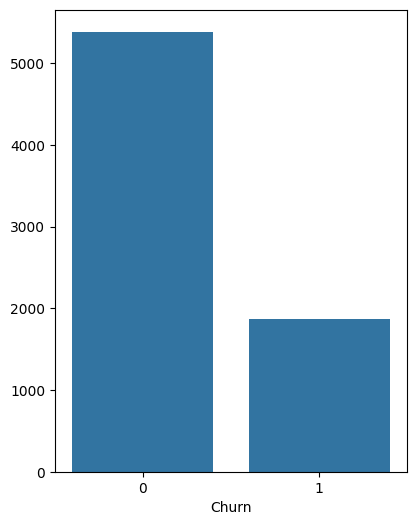

In [58]:
abandono_counts = df_normalizado["Churn"].value_counts().sort_index()
abandono_props = df_normalizado["Churn"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]

plt.figure(figsize=(10, 6))
# Gráfico de barras
# 0 = Permanece , 1 = Abandona
plt.subplot(1, 2, 1)
sns.barplot(x=abandono_counts.index, y=abandono_counts.values, order=[0, 1])



<Axes: xlabel='internet.InternetService', ylabel='Churn'>

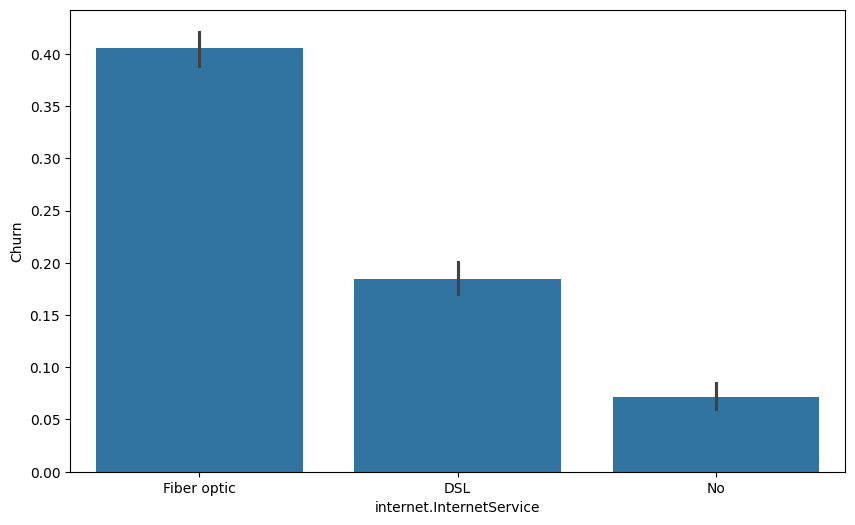

In [41]:
# Cancelacion tipo internet

orden_tipo_internet = df_normalizado.groupby('internet.InternetService')['Churn'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(x='internet.InternetService', y='Churn', data=df_normalizado, order=orden_tipo_internet)

<Axes: xlabel='account.Contract', ylabel='Churn'>

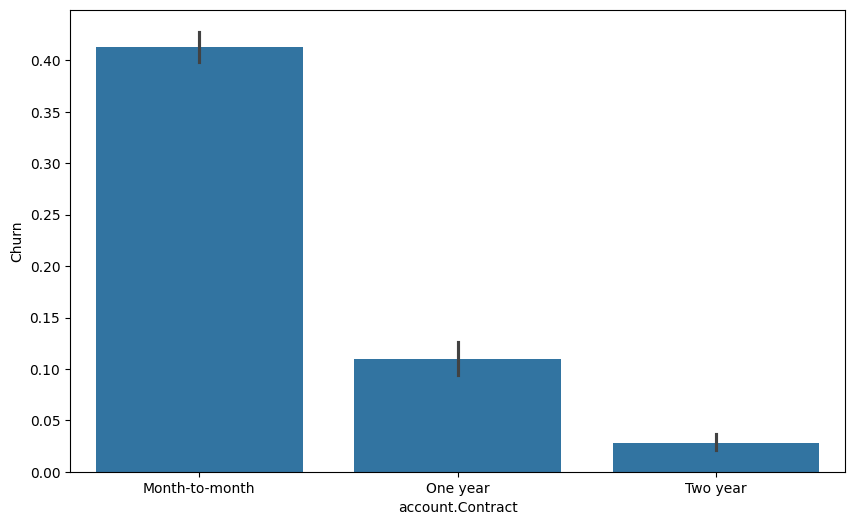

In [42]:
# Cancelacion por tipo de contrato

orden_tipo_contrato = df_normalizado.groupby('account.Contract')['Churn'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(x='account.Contract', y='Churn', data=df_normalizado, order=orden_tipo_contrato)

Text(0, 0.5, 'Meses de contrato')

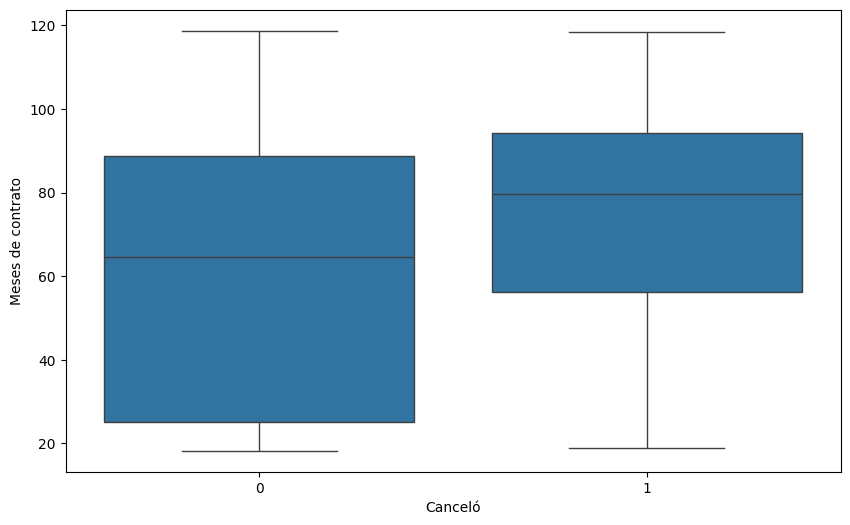

In [48]:
# Cancelacion Meses Contrato

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_normalizado)
plt.xlabel('Canceló')
plt.ylabel('Meses de contrato')





#📄Informe final

## Problematica
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.


## Tratamiento de datos


*   Limpiar Datos y Transformar
*   Reinicar indice de los datos
*   Limpieza de método de pago
*   Agreagar cuentas diarias
*   Ralizar Evasión por Categorias



## Resultados

| Servicio de Respaldo | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 61.24% | 38.76% |
| Sin servicio de internet | 92.83% | 7.17% |
| Sí | 79.08% | 20.92% |

---

### Protección de dispositivos (DeviceProtection)

| Servicio de Protección | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 62.09% | 37.91% |
| Sin servicio de internet | 92.83% | 7.17% |
| Sí | 78.09% | 21.91% |

---

### Soporte técnico (TechSupport)

| Servicio de Soporte | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 59.62% | 40.38% |
| Sin servicio de internet | 92.83% | 7.17% |
| Sí | 85.24% | 14.76% |

---

### TV por Streaming (StreamingTV)

| Servicio de TV | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 67.46% | 32.54% |
| Sin servicio de internet | 92.83% | 7.17% |
| Sí | 70.78% | 29.22% |

---

### Películas por Streaming (StreamingMovies)

| Servicio de Películas | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 67.27% | 32.73% |
| Sin servicio de internet | 92.83% | 7.17% |
| Sí | 70.94% | 29.06% |

---

### Contrato (Contract)

| Tipo de Contrato | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| Mensual (Month-to-month) | 58.68% | 41.32% |
| Un año (One year) | 89.06% | 10.94% |
| Dos años (Two year) | 97.23% | 2.77% |

---

### Facturación sin papel (PaperlessBilling)

| Factura sin Papel | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| No | 84.09% | 15.91% |
| Sí | 67.50% | 32.50% |

---

### Método de pago (PaymentMethod)

| Método de Pago | No se fueron (0) | Se fueron (1) |
| :--- | :---: | :---: |
| Transferencia bancaria (automática) | 83.74% | 16.26% |
| Tarjeta de crédito (automática) | 85.19% | 14.81% |
| Cheque electrónico (electronic check) | 56.20% | 43.80% |
| Cheque por correo (mailed check) | 81.41% | 18.59% |


## Conclusiones

Soporte técnico y servicios adicionales: Los clientes que no tienen soporte técnico (40.38% de evasión) o respaldo en línea (38.76% de evasión) son mucho más propensos a irse que aquellos que sí los tienen (con tasas de 14.76% y 20.92% respectivamente). Esto sugiere que la falta de un buen servicio de apoyo y de seguridad de datos es un factor crítico.

Contrato: La mayor tasa de evasión se da en los clientes con contratos de mes a mes (41.32%), mientras que los que tienen contratos a dos años casi nunca se van (2.77%). Esto demuestra que un compromiso a largo plazo reduce drásticamente la salida de clientes.

Método de pago: El cheque electrónico destaca como el método de pago con la tasa de evasión más alta, llegando a un 43.80%. Comparado con las transferencias automáticas, la tarjeta de crédito o el cheque por correo (todos con tasas de entre 14% y 18%), este método de pago parece estar fuertemente asociado con la salida de clientes.

Facturación sin papel: Curiosamente, los clientes que optan por la facturación sin papel tienen una tasa de evasión mucho más alta (32.50%) que los que prefieren la facturación tradicional en papel (15.91%). Esto podría indicar que este grupo de clientes es más joven, más digital y, quizás, menos fiel a la compañía.

## Recomendaciones

* Ofrecer soporte técnico proactivo: En lugar de esperar a que los clientes llamen, se podría implementar un sistema para identificar y contactar a los clientes que podrían estar en riesgo, ofreciéndoles asistencia personalizada.

* Promocionar paquetes de seguridad y respaldo: Se debe destacar el valor de estos servicios en la etapa de venta. Podrías ofrecer promociones especiales o paquetes que incluyan soporte y respaldo a un precio atractivo para los clientes nuevos.